# Exploração

## Função para pegar batimentos cardíacos

In [2]:
import neurokit2 as nk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


PATH = '/media/davi/2526467b-9f07-4ce5-9425-6d2b458567b7/home/davi/DADOS/CEUMA/parquet/'
FILE = 'BRO.parquet'

ecg = pd.read_parquet(PATH+FILE)['ECG'].to_numpy()

signals, info = nk.ecg_process(ecg_signal=ecg[2000*20:2000*30],sampling_rate=2000,)

In [3]:
info

{'ECG_R_Peaks': array([ 1569,  3143,  4626,  6076,  7561,  9069, 10607, 12137, 13597,
        15021, 16459, 17870, 19272])}

In [4]:
signals

ECG_Raw   ECG_Clean   ECG_Rate  ECG_Quality  ECG_R_Peaks  \
0      630.639811  412.335929  81.342145      0.16722            0   
1      652.126345  409.826502  81.342145      0.16722            0   
2      674.616922  407.272018  81.342145      0.16722            0   
3      697.910735  404.625790  81.342145      0.16722            0   
4      721.806973  401.839499  81.342145      0.16722            0   
...           ...         ...        ...          ...          ...   
19995 -107.131456   49.303041  85.592011      0.00000            0   
19996 -107.131456   48.911410  85.592011      0.00000            0   
19997 -105.725795   48.542311  85.592011      0.00000            0   
19998 -102.914473   48.190120  85.592011      0.00000            0   
19999  -99.099107   47.847075  85.592011      0.00000            0   

       ECG_P_Peaks  ECG_Q_Peaks  ECG_S_Peaks  ECG_T_Peaks  ECG_P_Onsets  \
0                0            0            0            0             0   
1                0            0            0            0             0   
2                0            0            0            0             0   
3                0            0            0            0             0   
4                0            0            0            0             0   
...            ...          ...          ...          ...           ...   
19995            0            0            0            0             0   
19996            0            0            0            0             0   
19997            0            0            0            0             0   
19998            0            0            0            0             0   
19999            0            0            0            0             0   

       ECG_T_Offsets  ECG_Phase_Atrial  ECG_Phase_Completion_Atrial  \
0                  0               NaN                          0.0   
1                  0               NaN                          0.0   
2                  0               NaN                          0.0   
3                  0               NaN                          0.0   
4                  0               NaN                          0.0   
...              ...               ...                          ...   
19995              0               NaN                          0.0   
19996              0               NaN                          0.0   
19997              0               NaN                          0.0   
19998              0               NaN                          0.0   
19999              0               NaN                          0.0   

       ECG_Phase_Ventricular  ECG_Phase_Completion_Ventricular  
0                        NaN                               0.0  
1                        NaN                               0.0  
2                        NaN                               0.0  
3                        NaN                               0.0  
4                        NaN                               0.0  
...                      ...                               ...  
19995                    NaN                               0.0  
19996                    NaN                               0.0  
19997                    NaN                               0.0  
19998                    NaN                               0.0  
19999                    NaN                               0.0  

[20000 rows x 15 columns]

In [5]:
plt.rcParams['figure.figsize'] = [15, 9]  # Bigger images

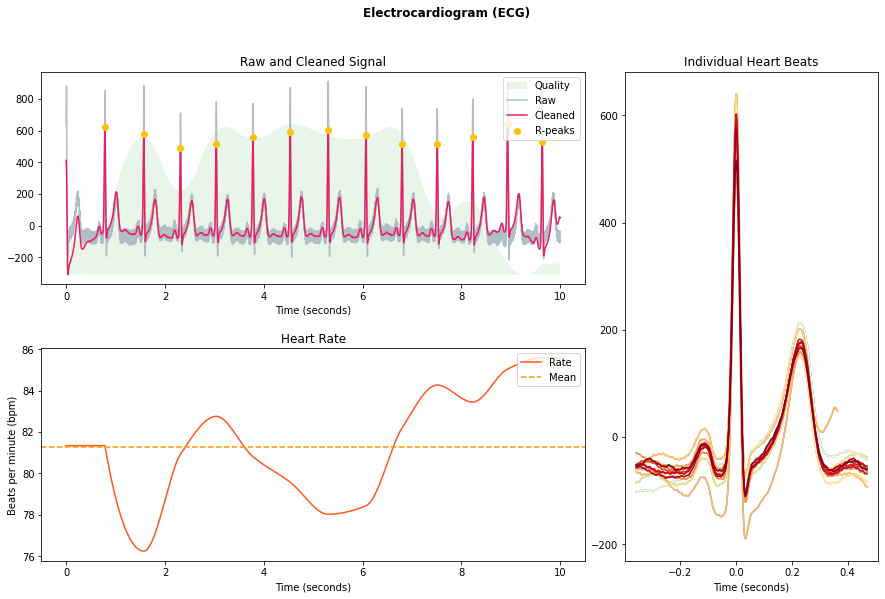

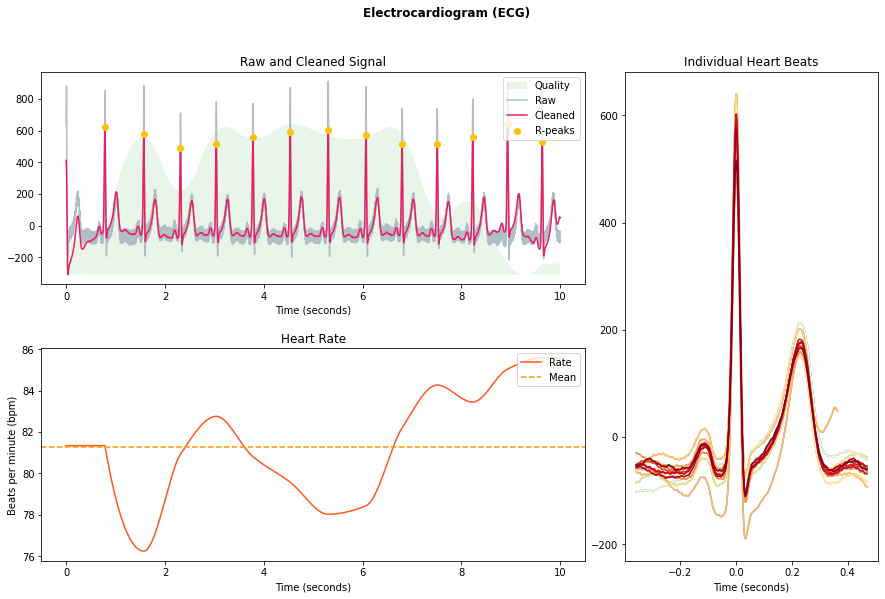

In [6]:
nk.ecg_plot(signals,sampling_rate=2000)

In [8]:
rpeaks = info['ECG_R_Peaks']
rpeaks

array([ 1569,  3143,  4626,  6076,  7561,  9069, 10607, 12137, 13597,
       15021, 16459, 17870, 19272])

In [9]:
clean_ecg = signals['ECG_Clean']
clean_ecg

0        412.335929
1        409.826502
2        407.272018
3        404.625790
4        401.839499
            ...    
19995     49.303041
19996     48.911410
19997     48.542311
19998     48.190120
19999     47.847075
Name: ECG_Clean, Length: 20000, dtype: float64

# Indetificando Batimentos apenas pela onda R

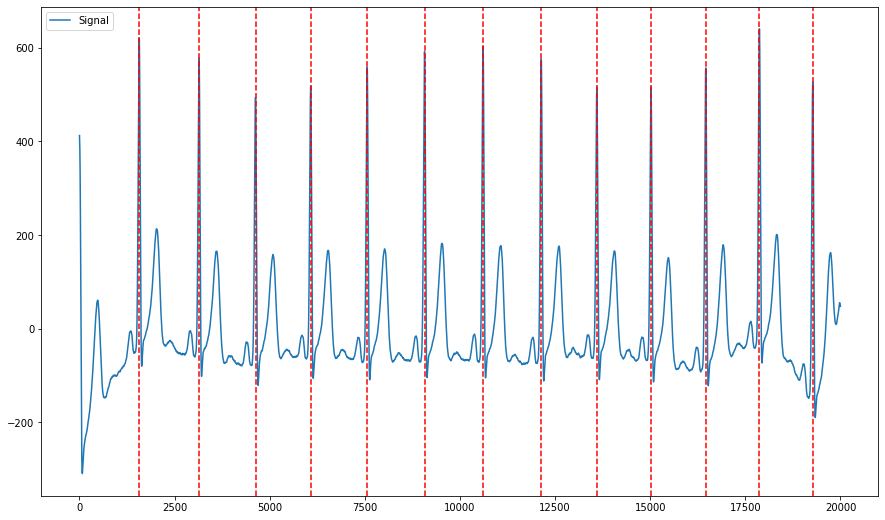

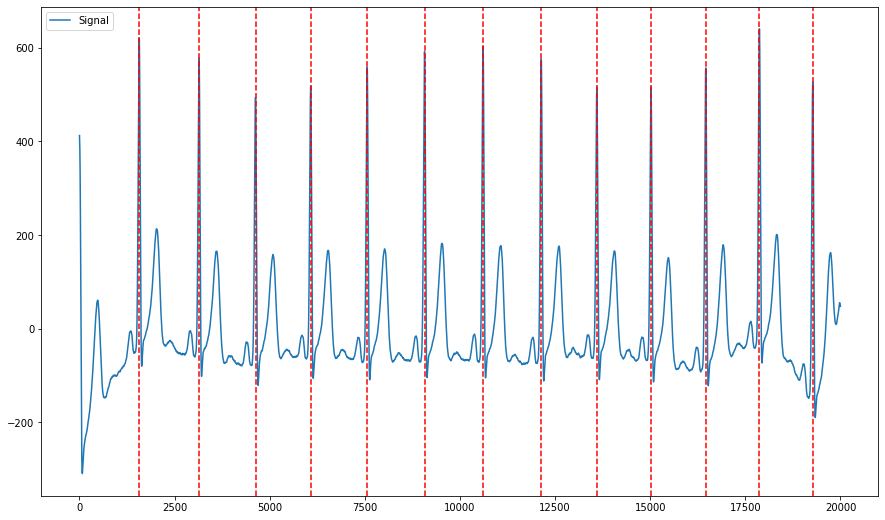

In [10]:
nk.events_plot(rpeaks, clean_ecg)

## Sobreposição de Batimentos

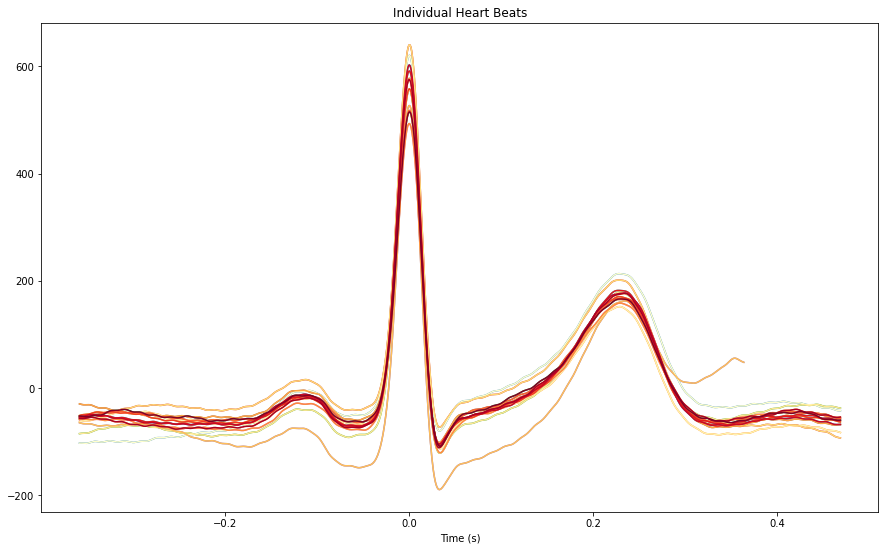

In [11]:

epochs = nk.ecg_segment(clean_ecg, rpeaks=None, sampling_rate=2000, show=True)

# Ondas P, Q, S, T

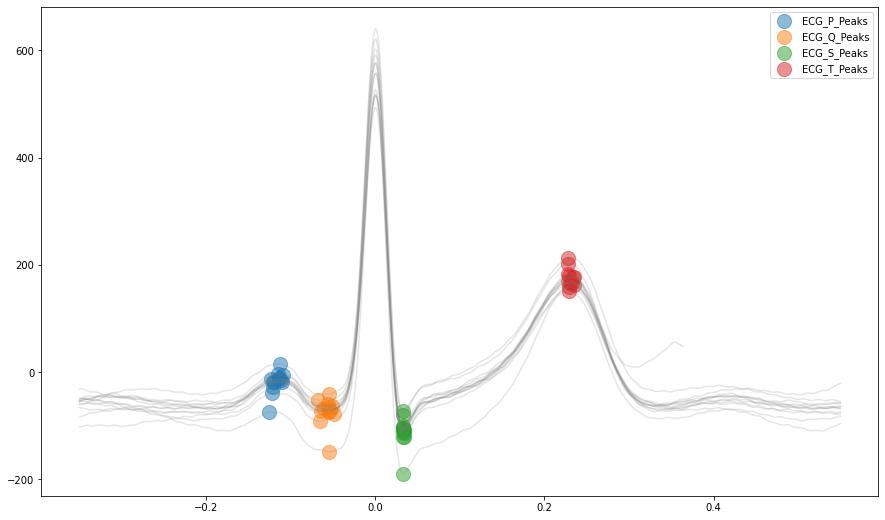

In [12]:
_,waves_peak = nk.ecg_delineate(clean_ecg,rpeaks,sampling_rate=2000,show=True, show_type='peaks')

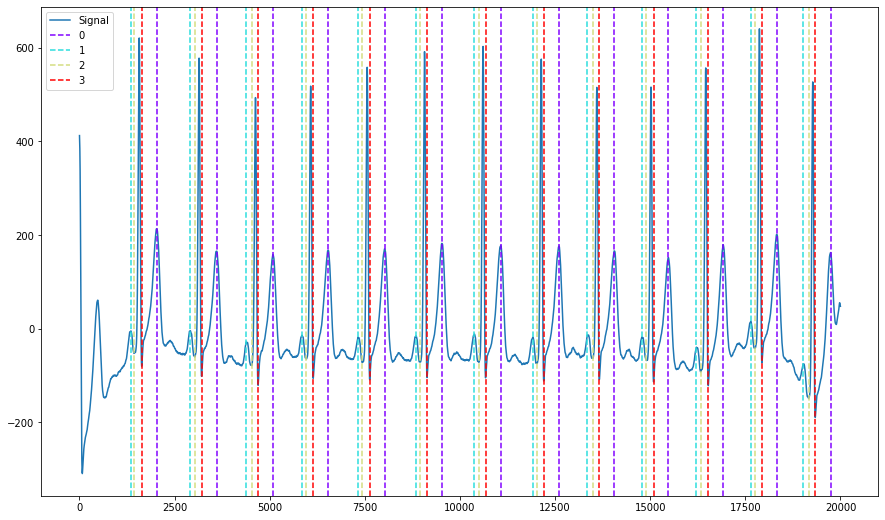

In [13]:
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], clean_ecg)